# Import Libraries & Load Data

In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing
import re
from collections import Counter

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

# WordCloud
from wordcloud import WordCloud

# Modeling utilities
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Plot style
sns.set(style="whitegrid", context="notebook")

# Display options
pd.set_option('display.max_colwidth', None)

# Load data
df = pd.read_csv("../raw_data/datafile.csv")  # Kaggle dataset
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


# Initial Data Inspection

In [2]:
print("Shape:", df.shape)
print("\nInfo:")
df.info()

print("\nData types:")
print(df.dtypes)

print("\nSample rows:")
display(df.head())

print("\nDescriptive statistics (including categorical):")
display(df.describe(include='all'))

print("\nNumber of duplicated rows:", df.duplicated().sum())


Shape: (14640, 15)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 1464

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)



Descriptive statistics (including categorical):


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,1.464000e+04,14640,14640.000000,9178,10522.000000,14640,40,14640,32,14640.000000,14640,1019,14640,9907,9820
unique,NaN,3,NaN,10,NaN,6,3,7701,13,NaN,14427,832,6804,3081,85
top,NaN,negative,NaN,Customer Service Issue,NaN,United,negative,JetBlueNews,Customer Service Issue,NaN,@united thanks,"[0.0, 0.0]",2/22/2015 14:22,"Boston, MA",Eastern Time (US & Canada)
freq,NaN,9178,NaN,2910,NaN,3822,32,63,12,NaN,6,164,11,157,3744
mean,5.692184e+17,NaN,0.900169,NaN,0.638298,NaN,NaN,NaN,NaN,0.082650,NaN,NaN,NaN,NaN,NaN
std,7.791092e+14,NaN,0.162830,NaN,0.330440,NaN,NaN,NaN,NaN,0.745778,NaN,NaN,NaN,NaN,NaN
min,5.675880e+17,NaN,0.335000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,5.685590e+17,NaN,0.692300,NaN,0.360600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,5.694780e+17,NaN,1.000000,NaN,0.670600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,5.698902e+17,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN



Number of duplicated rows: 36


 Inspected the structure, types, and basic statistics of the dataset to understand data that working with and to identify potential issues like duplicates and missing values.

# Check for Duplicates and handle duplicates

In [3]:
# Drop duplicate rows
df = df.drop_duplicates()
print("Number of duplicated rows after dropping:", df.duplicated().sum())


Number of duplicated rows after dropping: 0


After dropping dupicate rows(36), now 0 rows are duplicated.

# Missing Values Overview

Missing values per column:
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5445
negativereason_confidence        4101
airline                             0
airline_sentiment_gold          14564
name                                0
negativereason_gold             14572
retweet_count                       0
text                                0
tweet_coord                     13589
tweet_created                       0
tweet_location                   4723
user_timezone                    4814
dtype: int64


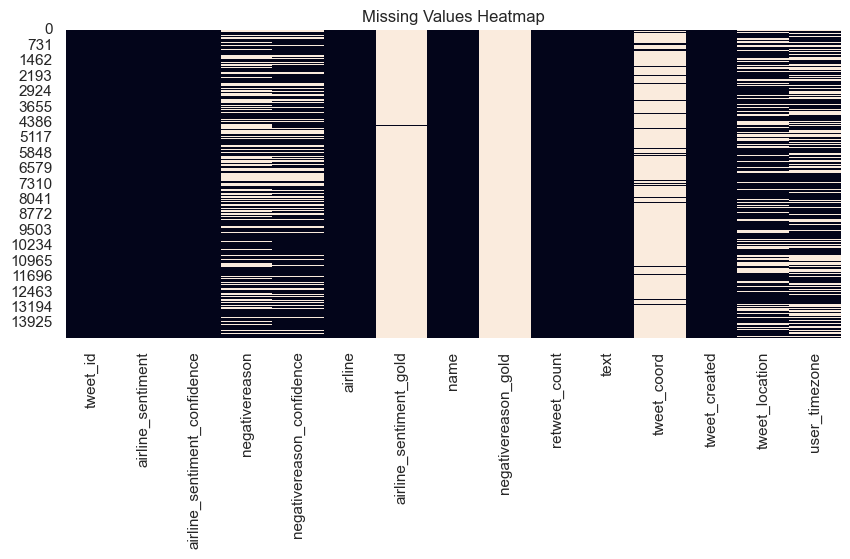

In [4]:
print("Missing values per column:")
print(df.isna().sum())

plt.figure(figsize=(10,4))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


Following columns has missing values:

negativereason                   5445

negativereason_confidence        4101

airline_sentiment_gold          14564

negativereason_gold             14572

tweet_coord                     13589

tweet_location                   4723

user_timezone                    4814

# Data Cleaning

# Handle Missing Values

In [5]:
# Filling negative reason-related fields
df['negativereason'] = df['negativereason'].fillna("None")
df['negativereason_confidence'] = df['negativereason_confidence'].fillna(0)

# Filling location-related fields
df['tweet_location'] = df['tweet_location'].fillna("Unknown")
df['user_timezone'] = df['user_timezone'].fillna("Unknown")

# Checking remaining missing values
print("Missing values after initial treatment:")
print(df.isna().sum())



Missing values after initial treatment:
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                      0
negativereason_confidence           0
airline                             0
airline_sentiment_gold          14564
name                                0
negativereason_gold             14572
retweet_count                       0
text                                0
tweet_coord                     13589
tweet_created                       0
tweet_location                      0
user_timezone                       0
dtype: int64


# Ensure critical fields are valid

In [6]:
# Convert tweet_created to datetime
df['tweet_created'] = pd.to_datetime(df['tweet_created'], errors='coerce')

# Check for invalid timestamps or missing text
invalid_rows = df[df['text'].isna() | df['tweet_created'].isna()]
print("Rows with missing text or invalid timestamp:", len(invalid_rows))

# Drop rows with missing critical fields
df = df[~(df['text'].isna() | df['tweet_created'].isna())].copy()

print("Shape after dropping invalid critical rows:", df.shape)
print(df.isna().sum())


Rows with missing text or invalid timestamp: 0
Shape after dropping invalid critical rows: (14604, 15)
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                      0
negativereason_confidence           0
airline                             0
airline_sentiment_gold          14564
name                                0
negativereason_gold             14572
retweet_count                       0
text                                0
tweet_coord                     13589
tweet_created                       0
tweet_location                      0
user_timezone                       0
dtype: int64


# Sort chronologically and create helper flag


In [7]:
# Sort by time to respect temporal order
df = df.sort_values('tweet_created')

# Flags for presence of location/timezone
df['has_location'] = df['tweet_location'].notna().astype(int)
df['has_timezone'] = df['user_timezone'].notna().astype(int)

# Confirm ordering
df[['tweet_created']].head(), df[['tweet_created']].tail()



(           tweet_created
 8965 2015-02-16 23:36:00
 8964 2015-02-16 23:43:00
 4325 2015-02-16 23:48:00
 4324 2015-02-16 23:52:00
 6745 2015-02-17 00:00:00,
            tweet_created
 8968 2015-02-24 11:48:00
 6747 2015-02-24 11:48:00
 6746 2015-02-24 11:48:00
 8967 2015-02-24 11:51:00
 8966 2015-02-24 11:53:00)

# Drop leakage-prone or unused columns

In [8]:
# Drop gold label columns to avoid leakage
leakage_cols = ['airline_sentiment_gold', 'negativereason_gold']
df = df.drop(columns=[c for c in leakage_cols if c in df.columns])

df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,has_location,has_timezone
8965,5.675880e+17,neutral,1.0,None,0.0000,Delta,JetBlueNews,0,@JetBlue's new CEO seeks the right balance to please passengers and Wall ... - Greenfield Daily Reporter http://t.co/LM3opxkxch,NaN,2015-02-16 23:36:00,USA,Sydney,1,1
8964,5.675900e+17,negative,1.0,Can't Tell,0.6503,Delta,nesi_1992,0,@JetBlue is REALLY getting on my nerves !! 😡😡 #nothappy,NaN,2015-02-16 23:43:00,undecided,Pacific Time (US & Canada),1,1
4325,5.675910e+17,negative,1.0,Late Flight,0.3460,United,CPoutloud,0,@united yes. We waited in line for almost an hour to do so. Some passengers just left not wanting to wait past 1am.,NaN,2015-02-16 23:48:00,"Washington, DC",Unknown,1,1
4324,5.675920e+17,negative,1.0,Late Flight,1.0000,United,brenduch,0,"@united the we got into the gate at IAH on time and have given our seats and closed the flight. If you know people is arriving, have to wait",NaN,2015-02-16 23:52:00,Unknown,Buenos Aires,1,1
6745,5.675940e+17,negative,1.0,Customer Service Issue,0.3451,Southwest,VahidESQ,0,"@SouthwestAir its cool that my bags take a bit longer, dont give me baggage blue balls-turn the carousel on, tell me it's coming, then not.",NaN,2015-02-17 00:00:00,"Los Angeles, CA",Pacific Time (US & Canada),1,1


In [9]:
# Check missing values
df.isna().sum()


tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                      0
negativereason_confidence           0
airline                             0
name                                0
retweet_count                       0
text                                0
tweet_coord                     13589
tweet_created                       0
tweet_location                      0
user_timezone                       0
has_location                        0
has_timezone                        0
dtype: int64

In [10]:
# Dropping missing column
df = df.drop(columns=['tweet_coord'])


In [11]:
# Check missing values
df.isna().sum()

tweet_id                        0
airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
name                            0
retweet_count                   0
text                            0
tweet_created                   0
tweet_location                  0
user_timezone                   0
has_location                    0
has_timezone                    0
dtype: int64

Now columns doesn't contain missing values.

# Text cleaning

In [12]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+", "", text)
    # Remove mentions
    text = re.sub(r"@\w+", "", text)
    # Remove hashtags symbol (keep word)
    text = re.sub(r"#", "", text)
    # Remove non-alphanumeric characters
    text = re.sub(r"[^A-Za-z0-9\s]", "", text)
    # Lowercase
    text = text.lower()
    return text

df['clean_text'] = df['text'].astype(str).apply(clean_text)

# Check for empty cleaned text
empty_clean = (df['clean_text'].str.strip() == "").sum()
print("Number of rows with empty clean_text:", empty_clean)

Number of rows with empty clean_text: 0


# NLP Preprocessing (Wrangling for Modeling)
  Tokenization, Stopwords, Lemmatization


In [13]:
# Ensure NLTK resources are available (run once if needed)
# nltk.download('stopwords')
# nltk.download('wordnet')

stop = set(stopwords.words('english'))
lemm = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(text):
    tokens = text.split()
    # Remove stopwords
    tokens = [w for w in tokens if w not in stop]
    # Lemmatize then stem
    tokens = [stemmer.stem(lemm.lemmatize(w)) for w in tokens]
    return " ".join(tokens)

df['processed_text'] = df['clean_text'].apply(preprocess)

df[['text', 'clean_text', 'processed_text']].head()


,text,clean_text,processed_text
8965,@JetBlue's new CEO seeks the right balance to please passengers and Wall ... - Greenfield Daily Reporter http://t.co/LM3opxkxch,s new ceo seeks the right balance to please passengers and wall greenfield daily reporter,new ceo seek right balanc pleas passeng wall greenfield daili report
8964,@JetBlue is REALLY getting on my nerves !! 😡😡 #nothappy,is really getting on my nerves nothappy,realli get nerv nothappi
4325,@united yes. We waited in line for almost an hour to do so. Some passengers just left not wanting to wait past 1am.,yes we waited in line for almost an hour to do so some passengers just left not wanting to wait past 1am,ye wait line almost hour passeng left want wait past 1am
4324,"@united the we got into the gate at IAH on time and have given our seats and closed the flight. If you know people is arriving, have to wait",the we got into the gate at iah on time and have given our seats and closed the flight if you know people is arriving have to wait,got gate iah time given seat close flight know peopl arriv wait
6745,"@SouthwestAir its cool that my bags take a bit longer, dont give me baggage blue balls-turn the carousel on, tell me it's coming, then not.",its cool that my bags take a bit longer dont give me baggage blue ballsturn the carousel on tell me its coming then not,cool bag take bit longer dont give baggag blue ballsturn carousel tell come


# Unigram frequency analysis

In [14]:
all_words = " ".join(df['processed_text']).split()
word_freq = Counter(all_words)
print("Top 20 unigrams:")
word_freq.most_common(20)


Top 20 unigrams:


[('flight', 4775),
 ('thank', 1683),
 ('get', 1614),
 ('hour', 1130),
 ('cancel', 1050),
 ('help', 1039),
 ('u', 1006),
 ('servic', 990),
 ('delay', 975),
 ('time', 958),
 ('custom', 934),
 ('call', 766),
 ('im', 762),
 ('bag', 752),
 ('wait', 745),
 ('plane', 715),
 ('fli', 688),
 ('need', 683),
 ('hold', 677),
 ('go', 661)]

#  Bigram and trigram frequency analysis

In [15]:
def get_top_ngrams(corpus, ngram_range=(2,2), top_k=20):
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(corpus)
    sums = X.sum(axis=0)
    freqs = [(word, sums[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    return sorted(freqs, key=lambda x: x[1], reverse=True)[:top_k]

print("Top 20 bigrams:")
top_bigrams = get_top_ngrams(df['processed_text'], ngram_range=(2,2))
top_bigrams

print("Top 20 trigrams:")
top_trigrams = get_top_ngrams(df['processed_text'], ngram_range=(3,3))
top_trigrams

Top 20 bigrams:
Top 20 trigrams:


[('cancel flight flight', 146),
 ('flight cancel flightl', 142),
 ('cancel flightl flight', 138),
 ('flight book problem', 88),
 ('flight cancel flight', 61),
 ('rt fleet fleek', 53),
 ('reflight book problem', 52),
 ('worst custom servic', 42),
 ('hour late flightr', 36),
 ('hour late flight', 36),
 ('poor custom servic', 23),
 ('call custom servic', 22),
 ('miss connect flight', 20),
 ('late flightr still', 19),
 ('terribl custom servic', 19),
 ('book problem flight', 19),
 ('custom servic rep', 19),
 ('great custom servic', 19),
 ('worst airlin ever', 18),
 ('battl appeas passeng', 17)]

# Feature Engineering
Text-Based Features


In [16]:
df['char_count'] = df['text'].astype(str).apply(len)
df['word_count'] = df['text'].astype(str).apply(lambda x: len(x.split()))
df['avg_word_len'] = df['char_count'] / df['word_count']

df['has_question'] = df['text'].str.contains(r"\?").astype(int)
df['has_exclamation'] = df['text'].str.contains(r"!").astype(int)


# Time-Based Features (for forecasting)

In [17]:
df['year'] = df['tweet_created'].dt.year
df['month'] = df['tweet_created'].dt.month
df['day'] = df['tweet_created'].dt.day
df['hour'] = df['tweet_created'].dt.hour
df['dayofweek'] = df['tweet_created'].dt.dayofweek


# Sentiment Encoding

In [18]:
sentiment_map = {'negative': -1, 'neutral': 0, 'positive': 1}
df['sentiment_label'] = df['airline_sentiment'].map(sentiment_map)

print("Sentiment distribution:")
print(df['airline_sentiment'].value_counts(normalize=True))



Sentiment distribution:
airline_sentiment
negative    0.627157
neutral     0.211654
positive    0.161189
Name: proportion, dtype: float64


# Exploratory Data Analysis (EDA)

# Sentiment Distribution

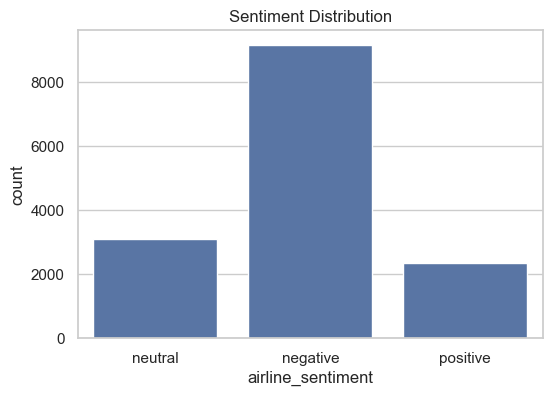

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='airline_sentiment')
plt.title("Sentiment Distribution")
plt.show()



This shows that most sentiments are "negative" and then "neutral" and "positive".

# Sentiment by Airline

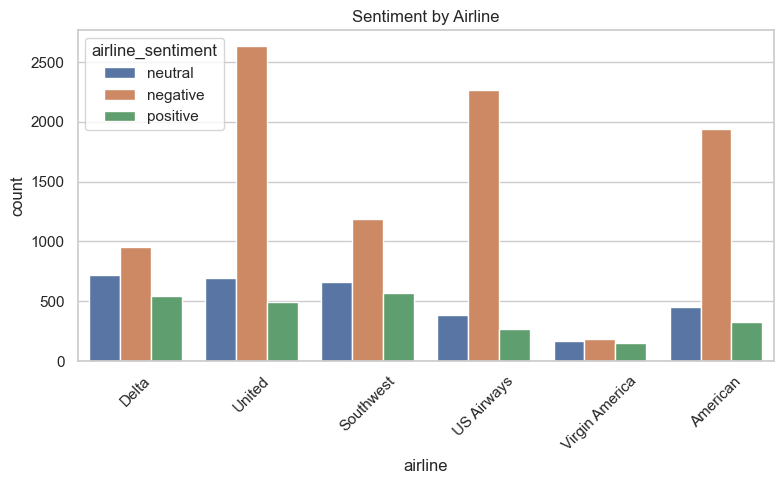

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='airline', hue='airline_sentiment')
plt.xticks(rotation=45)
plt.title("Sentiment by Airline")
plt.tight_layout()
plt.show()



# Negative Reason Breakdown

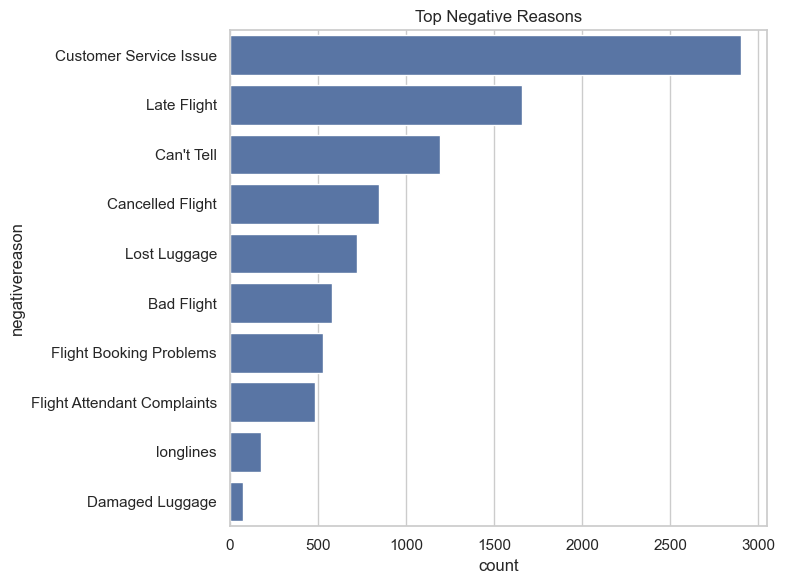

In [21]:
neg = df[df['airline_sentiment'] == 'negative']
plt.figure(figsize=(8,6))
sns.countplot(data=neg, y='negativereason', order=neg['negativereason'].value_counts().index)
plt.title("Top Negative Reasons")
plt.tight_layout()
plt.show()



#  Time-Series Sentiment Trends

<Axes: title={'center': 'Daily Average Sentiment Over Time'}, xlabel='tweet_created'>

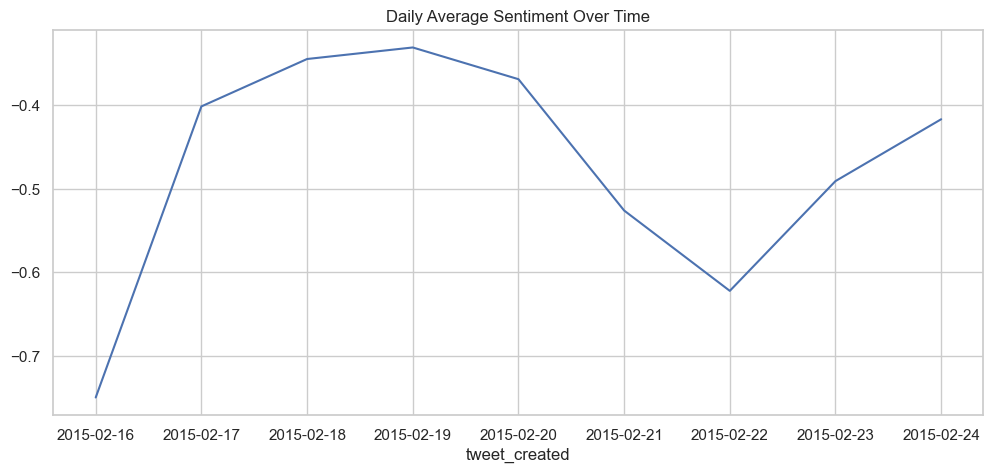

In [22]:
ts = df.groupby(df['tweet_created'].dt.date)['sentiment_label'].mean()
ts.plot(figsize=(12,5), title="Daily Average Sentiment Over Time")


# Word Clouds

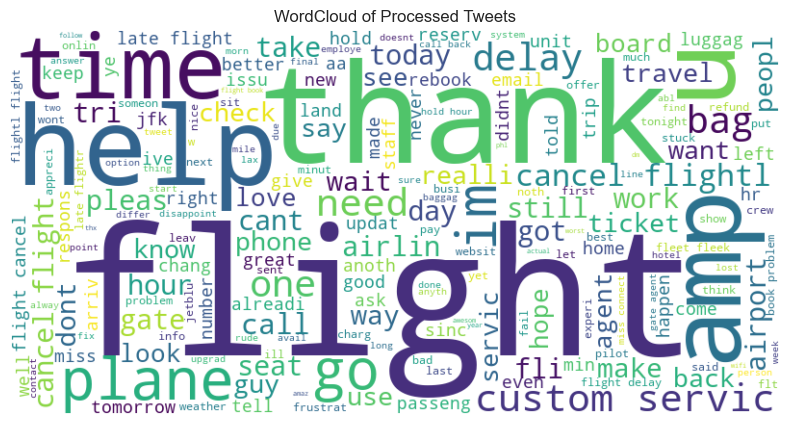

In [23]:
wc = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df['processed_text']))
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Processed Tweets")
plt.show()



# Correlation & Feature Relationships

# Numeric Correlation Matrix

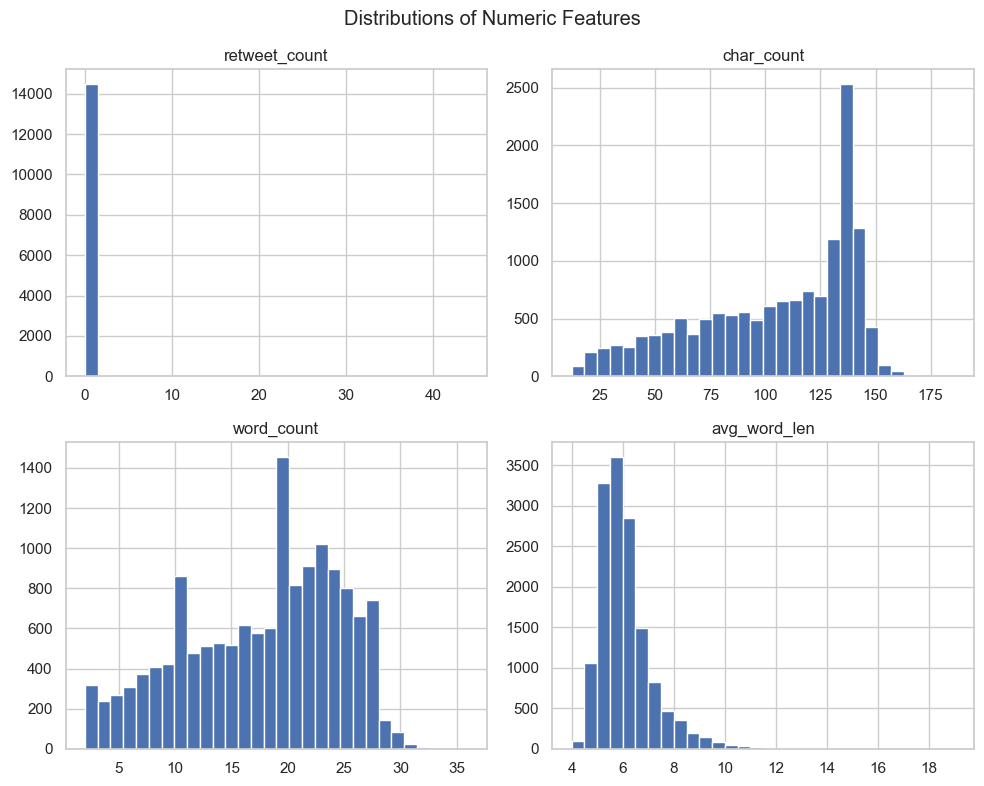

In [24]:
num_cols = ['retweet_count', 'char_count', 'word_count', 'avg_word_len']

df[num_cols].hist(figsize=(10,8), bins=30)
plt.suptitle("Distributions of Numeric Features")
plt.tight_layout()
plt.show()



# Outlier analysis (boxplots + IQR)

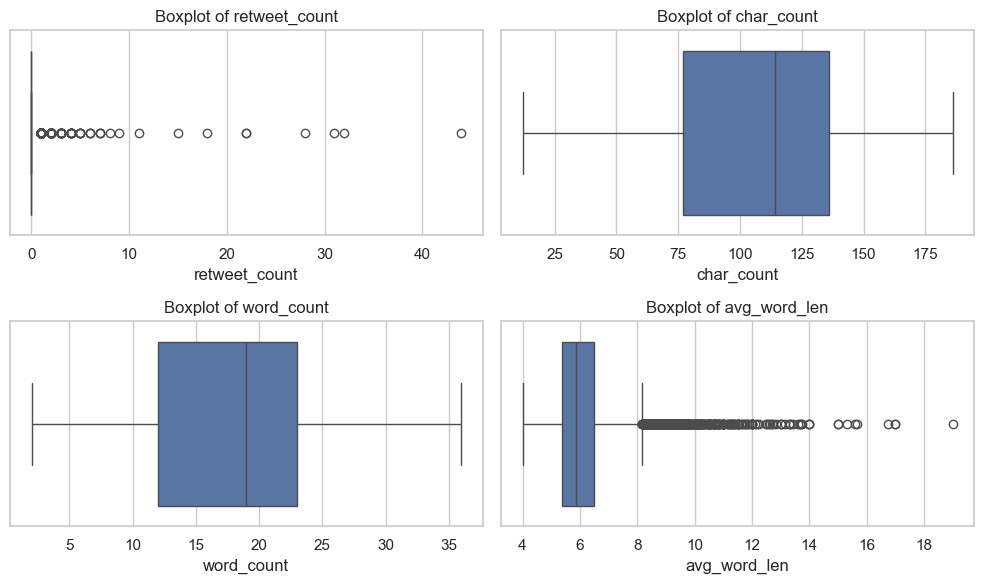

Outlier counts per numeric feature:


{'retweet_count': 766, 'char_count': 0, 'word_count': 0, 'avg_word_len': 744}

In [25]:
plt.figure(figsize=(10,6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# IQR-based outlier detection example
outlier_summary = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_summary[col] = outliers

print("Outlier counts per numeric feature:")
outlier_summary

Potential outliers using the IQR rule identified. For this project, these outliers reflect real user behavior (e.g., highly retweeted tweets), however now have a data-supported view.


# Correlation and collinearity analysis

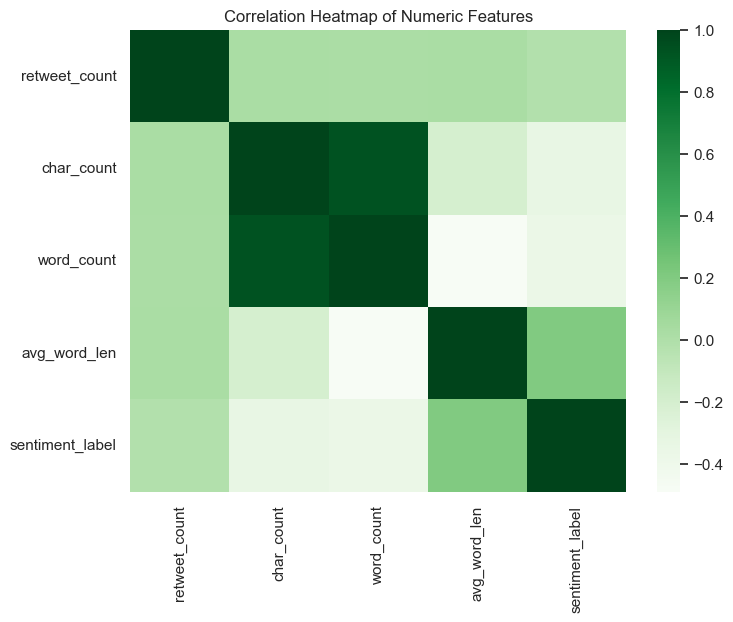

In [26]:
corr_cols = ['retweet_count', 'char_count', 'word_count', 'avg_word_len', 'sentiment_label']
corr = df[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='Greens', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

sentiment_label seems corelated with avg_word_len, retweet_count, and then with char_count and word_count.


#  Scatter plots / bi-plots

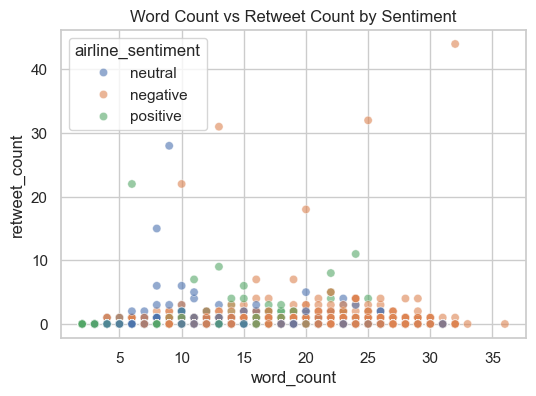

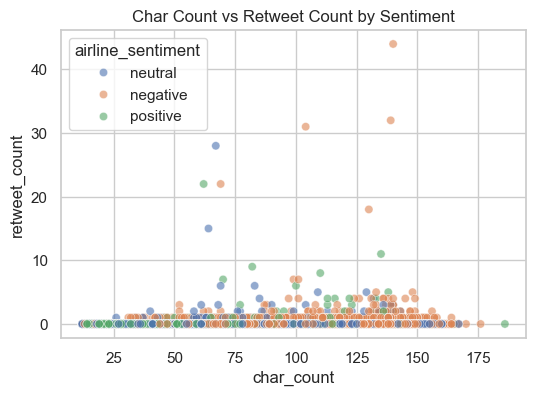

In [27]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='word_count', y='retweet_count', hue='airline_sentiment', alpha=0.6)
plt.title("Word Count vs Retweet Count by Sentiment")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='char_count', y='retweet_count', hue='airline_sentiment', alpha=0.6)
plt.title("Char Count vs Retweet Count by Sentiment")
plt.show()


These bi-plots help visualize how text length relates to engagement and that corelation varies by sentiment.

# Temporal trends and seasonality

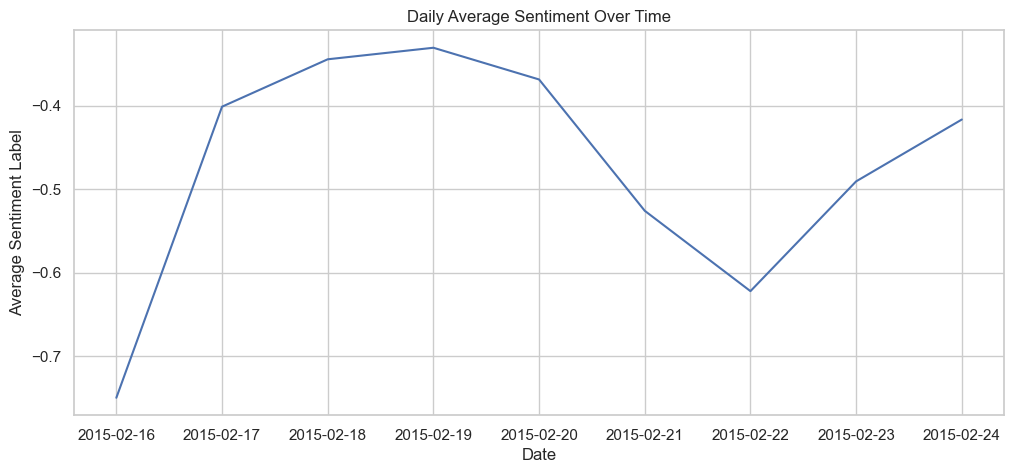

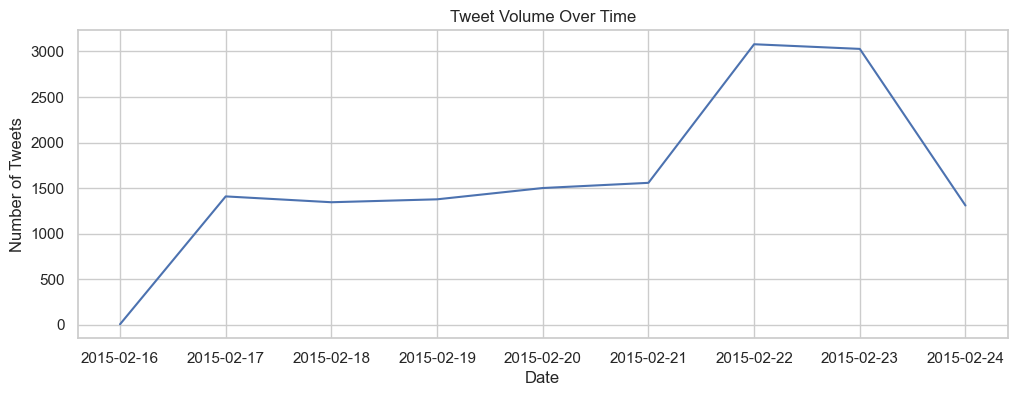

Time range: 2015-02-16 23:36:00 to 2015-02-24 11:53:00


In [28]:
# Daily average sentiment
ts = df.groupby(df['tweet_created'].dt.date)['sentiment_label'].mean()

plt.figure(figsize=(12,5))
ts.plot()
plt.title("Daily Average Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Label")
plt.show()

# Tweet frequency over time
plt.figure(figsize=(12,4))
df['tweet_created'].dt.date.value_counts().sort_index().plot()
plt.title("Tweet Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.show()

print("Time range:", df['tweet_created'].min(), "to", df['tweet_created'].max())

In [29]:
We examine both sentiment trends and tweet volume over time to detect any seasonal or event-driven patterns.

SyntaxError: invalid syntax (29525660.py, line 1)

In [ ]:
Feature importance intuition and selection rationale

In [ ]:
From the EDA, text-based features (processed_text) are clearly central to predicting sentiment. Length-based features (word_count, char_count, avg_word_len) show moderate correlation with sentiment and engagement (retweet_count). Time-based features (hour, dayofweek) may capture behavioral patterns in tweeting and airline response. char_count and word_count are highly correlated, so we may choose to keep only one in the final model to reduce redundancy. The sentiment distribution is somewhat imbalanced toward negative tweets, which we will account for during modeling via class weights or resampling.


In [ ]:
summarizing:
- Which features seem most promising for modeling (e.g., processed_text, negativereason, retweet_count, char_count, hour, airline).
- Which features might be redundant due to collinearity (e.g., char_count vs word_count).
- How class imbalance (if present) might affect modeling and whether resampling or class weights may be needed.


#  NLP Readiness Check


In [ ]:
# Text column must be non‑empty
(df['text'].str.strip() == "").sum()


In [ ]:
# Check total missing values per column
df.isna().sum().sort_values(ascending=False)

# Check for excessive noise (URLs, emojis, HTML)

In [ ]:
df['text'].sample(10).tolist()


# Check text length distribution

In [ ]:
df['text'].apply(len).describe()


# Check class balance for sentiment

In [ ]:
df['airline_sentiment'].value_counts(normalize=True)


#  Time‑Series Readiness Checks


# Convert timestamp to datetime

In [ ]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'], errors='coerce')
df['tweet_created'].isna().sum()


# Check chronological order

In [ ]:
df = df.sort_values('tweet_created')


# Check for duplicates in timestamps

In [ ]:
df['tweet_created'].duplicated().sum()


# Check time coverage

In [ ]:
df['tweet_created'].min(), df['tweet_created'].max()


In [ ]:
# Check frequency distribution
df['tweet_created'].dt.date.value_counts().sort_index().plot(figsize=(12,4))


# Feature Engineering Readiness Checks
  Check categorical columns for cardinality


In [ ]:
df.nunique().sort_values()


# Check numeric columns for outliers

In [ ]:
df[['retweet_count']].describe()


# Check if text cleaning is needed

In [ ]:
df['text'].iloc[0]


# Check if target variable is valid

In [ ]:
df['airline_sentiment'].unique()


# Modeling Readiness Checks

In [ ]:
# Check dataset size
df.shape

In [ ]:

# Ensure no leakage by not shuffling (respect time order)
train, test = train_test_split(df, test_size=0.2, shuffle=False)

print("Train shape:", train.shape)
print("Test shape:", test.shape)

# Sanity check: all text entries are strings
print("All text entries are strings:", df['text'].apply(lambda x: isinstance(x, str)).all())


In [ ]:
# Check if text is clean enough for vectorization
df['text'].apply(lambda x: isinstance(x, str)).all()


# Save Cleaned Dataset for Modeling

In [ ]:
df.to_csv("../data/twitter_airline_cleaned.csv", index=False)